# Práctica 2: Naive Bayes y Regresión Logística

#### Integrantes: Alejandro Bolaños García y David García Díaz

Importación de librerías

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


Carga de datos y creación de vectorizador

In [2]:
newsgroup = fetch_20newsgroups(subset='all')

X_train, X_test, y_train, y_test = train_test_split(newsgroup.data, newsgroup.target, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english', max_features=10000)

Función para optimización y evaluación

In [17]:
def optimize_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test, n_iter=10, cv=3):
    
    # Pipeline sin escalado
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer(max_features=10000, stop_words='english')),
        ('clf', model)
    ])
    
    # Búsqueda aleatoria de hiperparámetros
    search = RandomizedSearchCV(
        pipeline, 
        param_distributions=param_grid, 
        n_iter=n_iter, 
        cv=cv, 
        scoring='accuracy', 
        n_jobs=-1, 
        random_state=42
    )
    search.fit(X_train, y_train)
    
    # Obtener resultados
    best_params = search.best_params_
    best_score = search.best_score_
    best_model = search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    
    # Reporte de clasificación
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    
    return best_params, best_score, test_accuracy, report


Clasificación con Naive Bayes

In [11]:
# Creamos un pipeline que incluya el vectorizador y el clasificador
pipeline1 = Pipeline([
    ('vect', vectorizer),
    ('clf', MultinomialNB())
])

# Entrenamos el modelo
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', MultinomialNB())])

In [7]:
# Comprobar los resultados con los datos de prueba
predictions1 = pipeline1.predict(X_test)
print("Accuracy 1:", accuracy_score(y_test, predictions1))
print(classification_report(y_test, predictions1))


Accuracy 1: 0.8440318302387267
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       151
           1       0.65      0.86      0.74       202
           2       0.81      0.11      0.20       195
           3       0.54      0.82      0.65       183
           4       0.76      0.89      0.82       205
           5       0.78      0.81      0.79       215
           6       0.82      0.76      0.79       193
           7       0.86      0.94      0.90       196
           8       0.88      0.92      0.90       168
           9       0.97      0.93      0.95       211
          10       0.96      0.96      0.96       198
          11       0.96      0.94      0.95       201
          12       0.86      0.82      0.84       202
          13       0.96      0.89      0.92       194
          14       0.92      0.95      0.94       189
          15       0.92      0.96      0.94       202
          16       0.89      0.92      0.91       

Clasificación con Regresión Linear

In [8]:
pipeline2 = Pipeline([
    ('vect', vectorizer),
    ('clf', LogisticRegression())
])

pipeline2.fit(X_train, y_train)

C:\Users\alebo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', LogisticRegression())])

In [9]:
predictions2 = pipeline2.predict(X_test)
print("Accuracy 2:", accuracy_score(y_test, predictions2))
print(classification_report(y_test, predictions2))

Accuracy 2: 0.8734748010610079
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.75      0.80      0.78       202
           2       0.85      0.79      0.82       195
           3       0.66      0.69      0.68       183
           4       0.81      0.80      0.80       205
           5       0.86      0.82      0.84       215
           6       0.81      0.83      0.82       193
           7       0.89      0.91      0.90       196
           8       0.94      0.92      0.93       168
           9       0.94      0.95      0.94       211
          10       0.95      0.96      0.96       198
          11       0.98      0.93      0.95       201
          12       0.81      0.80      0.80       202
          13       0.90      0.94      0.92       194
          14       0.93      0.93      0.93       189
          15       0.89      0.98      0.93       202
          16       0.93      0.93      0.93       

Comparación de resultados

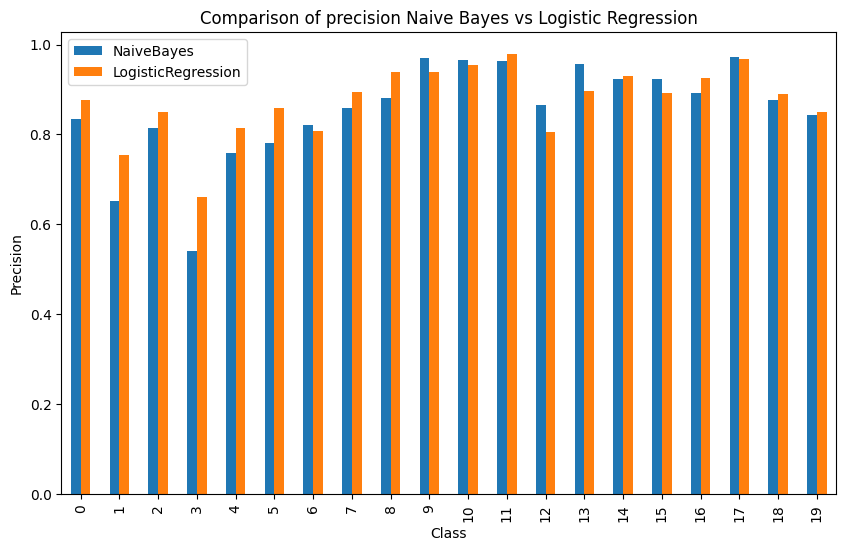

In [ ]:
report1 = classification_report(y_test, predictions1, output_dict=True)
report2 = classification_report(y_test, predictions2, output_dict=True)

# Convertir el informe a un DataFrame de pandas
df_report = pd.DataFrame(report1).transpose()
df_report2 = pd.DataFrame(report2).transpose()

# Seleccionar solo las clases (y no los promedios globales como 'accuracy', 'macro avg', etc.)
df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])
df_report2 = df_report2.drop(['accuracy', 'macro avg', 'weighted avg'])

x1 = df_report[['precision']]
x2 = df_report2[['precision']]
x = pd.concat([x1, x2], axis=1)
x.columns = ['NaiveBayes', 'LogisticRegression']

# Graficar
x.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Precision')
plt.xlabel('Class')
plt.title('Comparison of precision Naive Bayes vs Logistic Regression')
plt.show()


Optimización de parámetros para Naive Bayes

In [19]:
# Hiperparámetros para MultinomialNB
nb_param_grid = {
    'clf__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]  # Regularización en Naive Bayes
}

# Optimizar y evaluar Multinomial Naive Bayes
nb_best_params, nb_best_score, nb_test_accuracy, nb_report = optimize_and_evaluate(
    MultinomialNB(),
    nb_param_grid,
    X_train, y_train, X_test, y_test,
    n_iter=10,
    cv=3
)

# Imprimir resultados de Naive Bayes
print("Best Parameters (Naive Bayes):", nb_best_params)
print("Best CV Score (Naive Bayes):", nb_best_score)
print("Test Accuracy (Naive Bayes):", nb_test_accuracy)
print("Classification Report (Naive Bayes):\n", nb_report)


C:\Users\alebo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (Naive Bayes): {'clf__alpha': 0.1}
Best CV Score (Naive Bayes): 0.8402095504702248
Test Accuracy (Naive Bayes): 0.8554376657824934
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       151
           1       0.65      0.89      0.75       202
           2       0.87      0.17      0.28       195
           3       0.57      0.82      0.67       183
           4       0.79      0.89      0.83       205
           5       0.80      0.80      0.80       215
           6       0.85      0.78      0.81       193
           7       0.86      0.94      0.90       196
           8       0.92      0.92      0.92       168
           9       0.98      0.95      0.96       211
          10       0.98      0.96      0.97       198
          11       0.95      0.94      0.95       201
          12       0.85      0.85      0.85       202
          13       0.97      0.91      0.94       194
    

Optimización de parámetros para Regresión Logística

In [18]:
# Hiperparámetros para Logistic Regression
lr_param_grid = {
    'clf__C': [0.1, 1.0, 10.0],
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf__max_iter': [200]
}

# Optimizar y evaluar Logistic Regression
lr_best_params, lr_best_score, lr_test_accuracy, lr_report = optimize_and_evaluate(
    LogisticRegression(),
    lr_param_grid,
    X_train, y_train, X_test, y_test,
    n_iter=10,
    cv=3
)

# Imprimir resultados
print("Best Parameters (Logistic Regression):", lr_best_params)
print("Best CV Score (Logistic Regression):", lr_best_score)
print("Test Accuracy (Logistic Regression):", lr_test_accuracy)
print("Classification Report (Logistic Regression):\n", lr_report)


C:\Users\alebo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (Logistic Regression): {'clf__solver': 'liblinear', 'clf__max_iter': 200, 'clf__C': 0.1}
Best CV Score (Logistic Regression): 0.8780176844917209
Test Accuracy (Logistic Regression): 0.883289124668435
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       151
           1       0.75      0.83      0.79       202
           2       0.84      0.81      0.82       195
           3       0.70      0.72      0.71       183
           4       0.83      0.84      0.84       205
           5       0.86      0.82      0.84       215
           6       0.81      0.84      0.83       193
           7       0.90      0.91      0.91       196
           8       0.96      0.93      0.95       168
           9       0.94      0.96      0.95       211
          10       0.97      0.97      0.97       198
          11       0.98      0.94      0.96       201
          12       0.83      0.82  

Clasificación con SVC

In [23]:
pipeline3 = Pipeline([
    ('vect', vectorizer),
    ('clf', SVC())
])

pipeline3.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', SVC())])

In [24]:
predictions3 = pipeline3.predict(X_test)
print("Accuracy 3:", accuracy_score(y_test, predictions3))
print(classification_report(y_test, predictions3))

Accuracy 3: 0.3092838196286472
              precision    recall  f1-score   support

           0       0.77      0.13      0.23       151
           1       0.82      0.13      0.23       202
           2       0.88      0.34      0.49       195
           3       0.54      0.30      0.39       183
           4       0.96      0.11      0.20       205
           5       0.93      0.25      0.39       215
           6       0.27      0.73      0.39       193
           7       0.86      0.18      0.30       196
           8       0.08      0.96      0.14       168
           9       0.81      0.30      0.44       211
          10       0.96      0.37      0.53       198
          11       0.96      0.32      0.48       201
          12       0.37      0.23      0.28       202
          13       0.88      0.22      0.35       194
          14       0.98      0.27      0.42       189
          15       0.72      0.44      0.54       202
          16       0.79      0.30      0.44       

Clasificación con LinearSVC

In [25]:
pipeline4 = Pipeline([
    ('vect', vectorizer),
    ('clf', LinearSVC())
])

pipeline4.fit(X_train, y_train)

C:\Users\alebo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', LinearSVC())])

In [26]:
predictions4 = pipeline4.predict(X_test)
print("Accuracy 4:", accuracy_score(y_test, predictions4))
print(classification_report(y_test, predictions4))

Accuracy 4: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       151
           1       0.75      0.77      0.76       202
           2       0.82      0.77      0.79       195
           3       0.62      0.69      0.65       183
           4       0.83      0.81      0.82       205
           5       0.84      0.83      0.83       215
           6       0.79      0.78      0.79       193
           7       0.87      0.89      0.88       196
           8       0.95      0.94      0.94       168
           9       0.93      0.93      0.93       211
          10       0.97      0.96      0.97       198
          11       0.96      0.95      0.96       201
          12       0.81      0.76      0.78       202
          13       0.85      0.91      0.88       194
          14       0.93      0.94      0.93       189
          15       0.90      0.95      0.92       202
          16       0.88      0.91      0.90       

Clasificación con Random Forest

In [27]:
pipeline5 = Pipeline([
    ('vect', vectorizer),
    ('clf', RandomForestClassifier())
])

pipeline5.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('clf', RandomForestClassifier())])

In [28]:
predictions5 = pipeline5.predict(X_test)
print("Accuracy 5:", accuracy_score(y_test, predictions5))
print(classification_report(y_test, predictions5))

Accuracy 5: 0.8355437665782494
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       151
           1       0.70      0.77      0.73       202
           2       0.72      0.87      0.78       195
           3       0.66      0.67      0.66       183
           4       0.86      0.81      0.84       205
           5       0.89      0.78      0.83       215
           6       0.76      0.76      0.76       193
           7       0.81      0.83      0.82       196
           8       0.92      0.92      0.92       168
           9       0.90      0.93      0.91       211
          10       0.90      0.93      0.92       198
          11       0.94      0.93      0.94       201
          12       0.76      0.66      0.71       202
          13       0.81      0.88      0.84       194
          14       0.86      0.93      0.89       189
          15       0.84      0.97      0.90       202
          16       0.83      0.91      0.87       

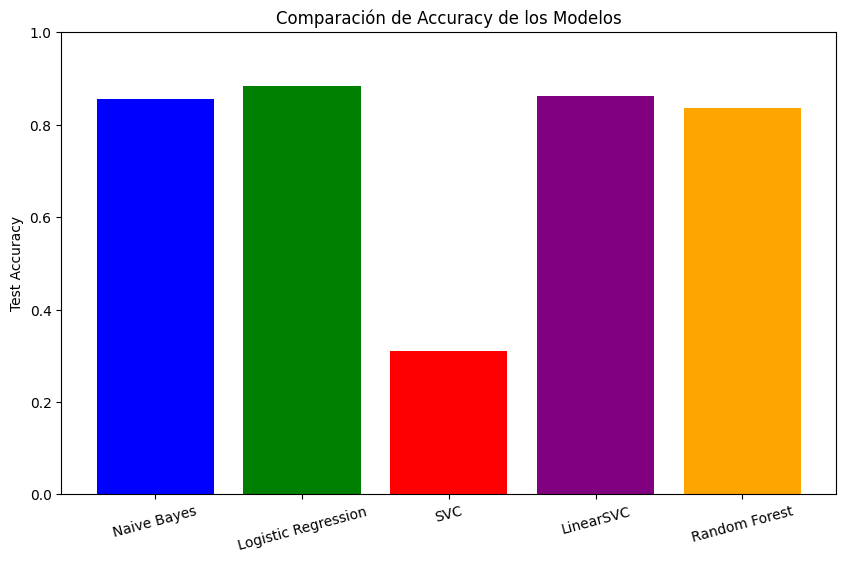


Conclusión Final:
El mejor modelo es Logistic Regression con un Test Accuracy de 0.8833.


In [37]:
# Resultados de todos los modelos
results = pd.DataFrame([
    {
        'Model': 'Naive Bayes',
        'Test Accuracy': nb_test_accuracy
    },
    {
        'Model': 'Logistic Regression',
        'Test Accuracy': lr_test_accuracy
    },
    {
        'Model': 'SVC',
        'Test Accuracy': accuracy_score(y_test, predictions3)
    },
    {
        'Model': 'LinearSVC',
        'Test Accuracy': accuracy_score(y_test, predictions4)
    },
    {
        'Model': 'Random Forest',
        'Test Accuracy': accuracy_score(y_test, predictions5)
    }
])

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Test Accuracy'], color=colors)
plt.ylabel('Test Accuracy')
plt.title('Comparación de Accuracy de los Modelos')
plt.ylim(0, 1)  
plt.xticks(rotation=15)
plt.show()

# Seleccionamos el mejor modelo
best_model = results.loc[results['Test Accuracy'].idxmax()]

# Conclusión final
print("\nConclusión Final:")
print(f"El mejor modelo es {best_model['Model']} con un Test Accuracy de {best_model['Test Accuracy']:.4f}.")


Tras realizar la clasificación del dataset 20 Newsgroups utilizando Naive Bayes, Regresión Logística, SVC, LinearSVC y Random Forest, se encontró que el mejor modelo fue Logistic Regression, con un Test Accuracy de 0.8833. Este resultado destaca la capacidad del modelo para capturar patrones complejos en el conjunto de datos mientras se beneficia de la optimización de hiperparámetros, como el ajuste de la regularización (C).

Aunque Naive Bayes fue eficiente y rápido, con un Test Accuracy de 0.8440, su desempeño fue superado por modelos como Logistic Regression y otros clasificadores que manejaron mejor la estructura de los datos. Por otro lado, los modelos como Random Forest y LinerSVC lograron resultados aceptables, pero con un costo computacional mayor y menor precisión en comparación con Logistic Regression.